In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import seaborn as sns 
import warnings
from scipy import stats

rc = {
    "axes.facecolor": "#F6F6F6",
    "figure.facecolor": "#F6F6F6",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "malgun gothic",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 1
}

plt.rc('axes', unicode_minus=False)
sns.set(rc=rc)
warnings.filterwarnings(action = 'ignore')

# **누적확률분포(CDF)**

Text(0.5, 1.0, ' $p = 0.2$ 의 누적 확률 분포')

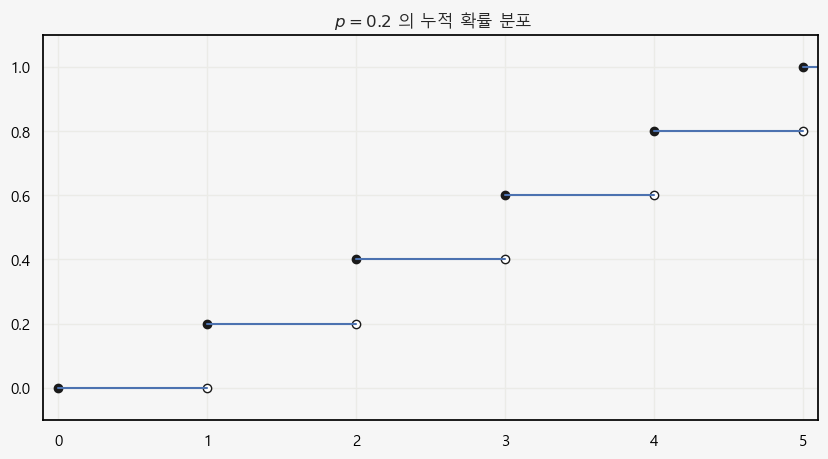

In [2]:
fig,ax = plt.subplots(figsize = (10,5))

ax.set_xlim([-0.1,5.1])
ax.set_ylim([-0.1,1.1])

for i in range(6):
    ax.plot([i,i+1],[i * 1/5 , i * 1/5], c = 'b')
    ax.scatter(i,i*1/5, c = 'k')
    ax.scatter(i+1,i*1/5,c = 'w',
                edgecolors = 'k')
ax.set_title(f' $p = 0.2$ 의 누적 확률 분포')

 누적 확률 분포는 다음과 같이 표기한다. 

$F(X)=P(X\ge x)$
와 같이 확률 변수 X 가 x보다 클 확률 혹은 작을 확률 혹은 어떤 값 이상, 이하일 확률 등으로 나타낼 수 있다.

​

누적 확률의 특성은 다음과 같다

​

 

누적확률분포는 감소하지 않는다. 

 

 누적 확률 분포가 증가 함수인 이유는 이름에서 나타나듯이 값이 확률 변수가 가질 수 있는 확률값이 누적되어 나타나기 때문이다. 

​

 만약 주사위를 던졌을 때 P(X <= 2) 인 경우는 P(X <= 1) + P(X = 2) 의 값이다. 

​

 확률값은 음수를 가질 수 없기 때문에 확률 변수 값이 증가 한다면 적어도 다음 확률 변수의 누적 확률 변수 값은 0 이상 증가한다. 

​

 2. 누적 확률 분포는 우연속 함수이다.

​

 주사위를 던졌을 때 2 미만의 수가 나올 확률과 2 이하의 수가 나올 확률은 공간이 다르다.

​

 그러니 왼쪽에서 2의 값으로 가는 극한값은 2 미만의 수가 나올 확률 (1. 9999 ...) 을 의미하는 것이고, 오른쪽에서 2의 극한 값으로 가는 경우는 2 이하의 (2. 000000 ... ) 수가 나올 확률을 묻는 것으로 이해했다. 

​

 3. F(X) 에서 x  가 0에 가까워 질 수록 F(x) = 0 에 수렴하고 , x 가 무한에 가까워 질 수록 F(X) = 1에 수렴한다.

​

 확률 변수가 가질 수 있는 값이 0에 가까워지 수록 누적 확률 분포는 0에 가까워지고 (발생하는 사건이 없으니) 모든 확률 변수의 값을 가질 수록 누적 확률 분포 값은 1에 가까워진다. 

# **초기하분포**

$P(X = k) = \frac{{\binom{K}{k} \binom{N-K}{n-k}}}{{\binom{N}{n}}}$

﻿
이항 분포와 다른 점은 표본을 비복원 추출로 뽑는다는 것인데, 이는 각 i 번째 시행이 i +1 번째 시행의 확률에 영향을 미친다는 것이다.


52장의 카드 중 5장의 카드를 뽑을 때 그 중 ACE(4종류의 ACE 카드가 존재)가 k 개 있을 확률로 예시를 보는 것이 좋은 것 같다.


내가 만약 첫번째 카드로 ACE 카드를 뽑았다면 다음 카드에 ACE 가 나올 확률은 변하게 될 것이다.


해당 식에서 분모에 해당하는 N C n 은 52장의 카드 중 5장의 카드를 뽑을 때를 의미하게 될 것이고


K C k 는 4장의 ace 카드 종류 중 k 장의 에이스를 뽑는 경우의수와 52 장 중 4 종류의 에이스 카드를 제외한 비 에이스 카드들 중에서


5 - k (5장의 패 중 에이스가 아닌 카드) 개를 뽑는 경우의 수를 구하는 것이다.

﻿


In [3]:
N = 52 
n = 5
k = 4

hypergeom = stats.hypergeom(N,n,k)

Text(0.5, 1.0, '52 장의 카드 중 k 장의 에이스 카드를 뽑을 초기하분포')

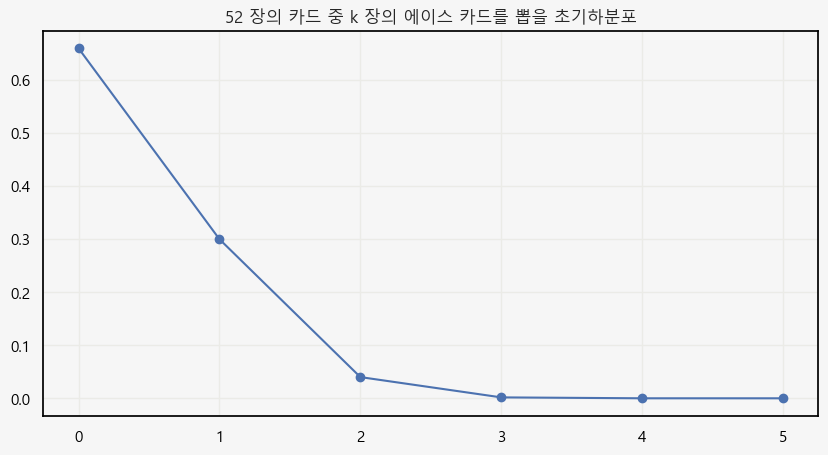

In [4]:
fig,ax = plt.subplots(figsize = (10,5))

ax.plot(hypergeom.pmf(range(6)), marker = 'o')
ax.set_xticks(np.arange(0,6))

ax.set_title('52 장의 카드 중 k 장의 에이스 카드를 뽑을 초기하분포')



수식을 변형하면서 구하는 방법도 있으나, 기대값의 선형성을 이용해서 구해보자


우선 확률변수 X 를 지시 변수로 생각해보자


xi 는 x 가 에이스일 때는 1, 에이스가 아닐 때 0인 지시 변수이다. (indicator variable) , 그렇다면 각 xi 의 기대값은 52장의 카드 중 에이스 카드를 선택하는 확률이 4/52인 베르누이 분포를 따르기 때문에, 각 시행의 기대값은 4/52 이다.


예시는 52장의 카드 중 4종류의 에이스 카드가 있을 때, 내가 5장의 카드를 뽑아서 i 개의 ACE 카드가 있을 분포의 기대값을 구한다고 생각해보자



$E(X)=E(x1​+x2​...+x5​)​$
를 찾자는 것으로 볼 수 있다.


이는 기대값의 선형성에 의해



$E(X)=E(x_1)+E(X_2)+...+E(X_5)$
로 볼 수 있다.


위에서 언급하였듯 각 시행의 기대값은 p , 즉 4/52 이다.


이는 기대값이 4/52 인 확률 변수가 n 개 존재하는 것이기 때문에


이를 간단히 쓰면



$E(X)=n*\frac{K}{N}$

가 나온다.


그러니 52장(N)의 카드 중 5(n)장의 카드를 뽑았을 때 4장(K)개 있는 에이스를 뽑을 때의 기대값은


5 * (4 / 52) 로 5/13 로 생각 할 수 있다.


﻿

Text(0.5, 0.98, 'M,N,K 에 대해 다양한 초기하분포의 분포')

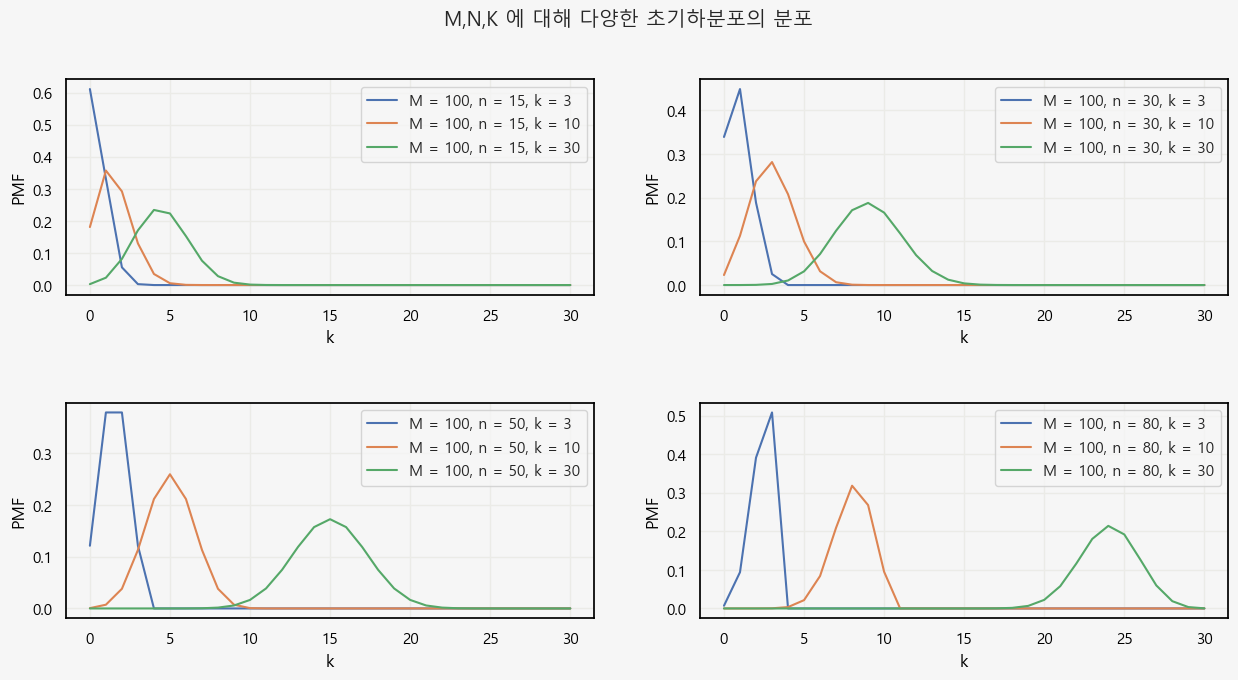

In [101]:
fig,ax = plt.subplots(ncols = 2,nrows = 2,figsize = (15,7))
ax = ax.flatten()
fig.subplots_adjust(hspace = 0.5)
M = 100
for i,n in enumerate([15,30,50,80]):
        for k in [3,10,30]:
                hypergeom = stats.hypergeom(M,n,k)
                
                ax[i].plot(hypergeom.pmf(range(31)),
                        label = f'M = {M}, n = {n}, k = {k}')  
                ax[i].set_xlabel('k')
                ax[i].set_ylabel('PMF')
                ax[i].legend()

fig.suptitle('M,N,K 에 대해 다양한 초기하분포의 분포')

초기하 분포는 지정된 수의 성공 및 실패를 포함하는 유한 모집단에서 대체하지 않고 고정된 크기의 표본에서 특정 수의 성공을 얻을 확률을 설명하는 이산 확률 분포이다. 초기하 분포의 그래프는 다음과 같은 특징이 있다.


불연속 특성: 초기하 분포는 불연속 확률 분포이다. 즉, 값의 연속적인 범위가 아닌 개별 값에 확률을 할당한다.

모양: 초기하 분포 그래프의 모양은 분포의 매개변수, 즉 모집단 크기, 모집단의 성공 횟수 및 표본 크기에 따라 달라집니다. 그래프는 정규 분포의 종 모양 대칭과 달리 일반적으로 왜곡되고 비대칭이다.

피크: 초기하 분포의 그래프는 일반적으로 단일 피크 또는 모드를 가집니다. 피크의 위치는 분포의 매개변수에 따라 다르며 샘플에서 성공 가능성이 가장 높은 수를 나타냅니다.
확률질량함수(Probability Mass Function, PMF): 초기하 분포 그래프는 확률질량함수(probability mass function)를 나타내며, 표본에서 가능한 각 성공값을 관찰할 확률을 제공한다. PMF는 그래프의 각 불연속 값에 확률을 할당한다.

한계: 그래프는 0개의 성공(또는 가능한 최소값)에서 샘플 크기의 최소값 또는 모집단의 성공 수까지 확장됩니다. 이 한계를 넘어서면 추가 성공 확률은 0이 됩니다.

대칭: 모집단의 성공 횟수와 실패 횟수가 동일한 경우와 같이 일부 특수한 경우 초기하 분포는 중간점을 중심으로 대칭을 나타낼 수 있다. 그러나 일반적으로 비대칭이다.

확률 감소: 초기하 분포에 의해 할당된 확률은 일반적으로 피크 값에서 멀어짐에 따라 감소한다. 그래프는 샘플의 성공 횟수가 가장 가능성이 높은 값에서 벗어날 때 감소하는 확률을 보여줍니다.

초기하 분포 그래프의 특성은 분포의 특정 매개변수에 따라 달라질 수 있다는 점에 유의해야 한다. 그래프의 모양과 동작은 기본 모집단과 샘플 크기는 물론 두 가지 모두의 성공 횟수에 의해 영향을 받습니다.

# **기하분포**

﻿

$X$~$Geo(k)$

기하분포는 베르누이 분포를 따르는 시행을 k 번 시도하여 처음 성공하기 전까지 시도 횟수의 분포를 의미한다.


기하분포의 기대값을 구하기 위해 기대값의 확률 질량 함수를 생각해보자


$P\left(X\ =\ k\right)\ =\ pq^k$

기하분포는 우선 경우의 수를 고려할 필요가 없다.


그 이유는 무조건 n 번의 시도 중 마지막 시도를 제외한 모든 시도들은 실패이며, 마지막 시도는 성공으로 끝나기 때문이다.


$P(X=5)=>FFFFFS$

k 가 5라는 것은 5번 실패하고 한 번 성공할 확률을 묻는 것이기 때문에


q ^5 * p 가 되는 것이다.

﻿

﻿
### **기하 분포의 기대값**

$E(X) = \sum_{k=0}^{\infty} kq^kp$
 
$= p \sum_{k=0}^{\infty} kq^k$


이다. 이 때 p 는 k 와 상관없기 때문에 시그마 밖으로 빼서 볼 수 있다


k= 0 부터 시작했지만 1부터 시작하게 하고, q^k 를 q^k-1 로 바꿔주자

$p \sum_{k=1}^{\infty} kp^{k-1}$





k q^{k-1} 은 마치 q^k 를 k 에 대해 미분한 것과 같이 생겼다.


$p \sum_{k=1}^{\infty} \frac{d}{dk}q^k$

k 에 대해서 q^k 를 미분해줬다.

$= p \frac{d}{dk} \sum_{k=1}^{\infty} q^k$

q^k 를 1부터 무한까지 더하는 것은 초항이 q 이고 공비가 q 인 등비급수의 합과 같다.

$= p \frac{d}{dk} \frac{q}{1-q}$

$= p \frac{1}{(1-q)^2}
$

$= p * \frac{1}{p^2}
$

$
= \frac{1}{p}
$
로 기하 분포의 기대값은 1 / p 이다.


만약 성공 확률이 10%인 불공평한 동전 던지기가 있다고 해보자. 모든 시행은 독립적이며 같은 베르누이 분포를 따른다.


이 때 한 번이라도 성공하기 위해서는 평균적으로 1 / 10% 인 10번을 던져야 한 번 성공한다는 말이 일리가 있다.

﻿

Text(0.5, 1.0, 'P 에 따른 기하 분포 차이')

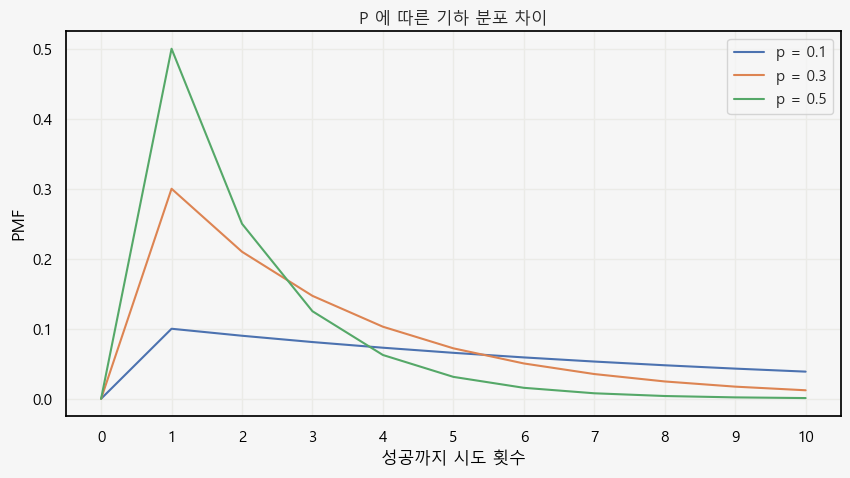

In [121]:
fig,ax = plt.subplots(figsize = (10,5))

for p in [0.1,0.3,0.5]:
    
    geom = stats.geom(p)
    
    ax.plot(geom.pmf(range(10+1)),
            label = f'p = {p}')
    ax.legend()
    ax.set_xticks(np.arange(10+1))
    ax.set_xlabel('성공까지 시도 횟수')
    ax.set_ylabel('PMF')
    
ax.set_title('P 에 따른 기하 분포 차이')